       x1      x2
0  24.412  32.932
1  35.190  12.189
2  26.288  41.718
3   0.376  15.506
4  26.116   3.963
(60, 2)


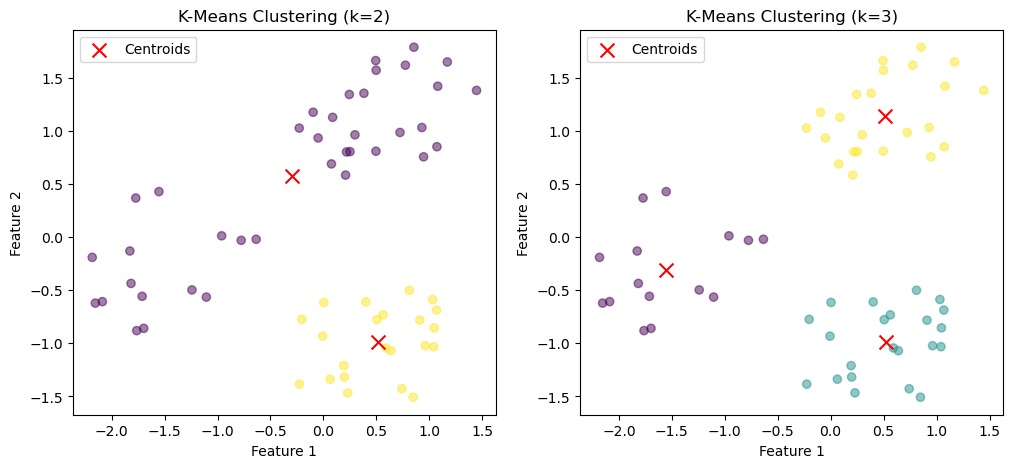

In [29]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Loading the dataset
path1 = r'C:\Users\KIIT\Downloads\kmeans - kmeans_blobs.csv'  
data = pd.read_csv(path1)
# Checking the dataset structure
print(data.head())
print(data.shape)
X = data.iloc[:, :2].values  # Since the dataset has two features Taking the first two columns for clustering
# Normalizing the data using Z-score Normalization
X_mean, X_std = X.mean(axis=0), X.std(axis=0)
X = (X - X_mean) / X_std
# Putting centroids randomly
def initialize_centroids(X, k):
    np.random.seed(42)  # For reproducibility
    return X[np.random.choice(X.shape[0], k, replace=False)]
# Assigning points to the nearest centroid
def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)
# Function to update the centroids
def update_centroids(X, labels, k):
    return np.array([X[labels == i, :].mean(axis=0) for i in range(k)])
# K-Means implementation
def k_means(X, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
    return centroids, labels
# Performing K-Means for k=2 and k=3
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, k in enumerate([2, 3]):
    centroids, labels = k_means(X, k)
    axes[i].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5)
    axes[i].scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
    axes[i].set_title(f'K-Means Clustering (k={k})')
    axes[i].set_xlabel('Feature 1')
    axes[i].set_ylabel('Feature 2')
    axes[i].legend()
plt.show()
